In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [44]:
labels = ["1-severe_toxic", "2-hate_speech", "7-abusive", "17-covertly-aggressive", "15-offensive", "29-sexism", "6-cyberbullying", "18-spam", "19-harrasment", "1-obscene", "1-insult", "9-homophobic", "9-racist", "27-vulgar", "1-threat", "3-profane", "AVERAGE"]
results = [[28.5, 68.3, 82.8, 26.3, 49.2, 29.1, 36.5, 7, 39.6, 65.5, 62.6, 4, 6.2, 67.6, 11.4, 54.4, 37.6],
[36.3, 97.7, 82.4, 25.5, 49.6, 29.1, 50.6, 1.7, 43.3, 69, 67.5, 3.5, 6.1, 61.8, 14, 55.6, 40.8],
[12.3, 56.8, 87.6, 29.7, 63, 39.1, 31.6, 10.5, 42.8, 45.9, 43.9, 3.2, 5.9, 73, 4.4, 42, 34.8],
[13.9, 35.1, 30.8, 90.2, 33.8, 30.3, 25.6, 0.9, 21.5, 32.3, 34.5, 3.5, 2.8, 33.4, 4.6, 24.5, 24.6],
[5.1, 54.7, 80.9, 38.2, 82.2, 48.2, 26.1, 8.2, 43.5, 24.9, 23.7, 3.1, 6.1, 73.4, 1.8, 37.1, 32.8],
[4.3, 53.8, 46.4, 33.5, 42.8, 88.6, 30.3, 10.4, 39.9, 16, 15.8, 6, 5.7, 35.9, 1.1, 27.5, 26.9],
[4.9, 48.8, 58.8, 27.7, 51, 48.3, 33.8, 30.5, 41.1, 22.1, 21.6, 2.9, 5.7, 57.7, 1.7, 28.9, 28.6],
[1.1, 14.6, 27.4, 10.1, 19.7, 13.9, 6.4, 53.9, 18.5, 5.1, 4.3, 3, 5.2, 23.8, 0.3, 13.2, 13.0],
[37.4, 69.8, 36.7, 15.7, 32.2, 20.2, 40.2, 3.7, 75.4, 54.2, 55.8, 2.6, 6.3, 29.6, 18, 44.1, 31.9],
[1.9, 40.7, 50.2, 22.4, 49.6, 41.6, 11.5, 31, 41.2, 10.8, 10.2, 3, 5.6, 72.5, 0.7, 27.1, 24.7],
[2.1, 41.3, 50.7, 25.3, 50.1, 42.4, 11.5, 30.5, 41.4, 11.5, 10.8, 3, 5.6, 72.3, 0.7, 27.5, 25.1],
[3.8, 36.9, 23.7, 22.5, 27.6, 18.8, 9.8, 7.4, 13.8, 14.6, 14.5, 65.6, 0.9, 34.7, 0.8, 15.5, 18.3],
[2.1, 31.4, 41.3, 33.3, 49.1, 48, 13.2, 19.2, 40, 11.7, 12.4, 2, 29.2, 51.4, 0.8, 24.6, 24.1],
[4.9, 59.4, 72.4, 37.1, 56.8, 43.2, 26.1, 4, 41.5, 23.5, 23.1, 6.1, 8.6, 97.2, 1.7, 38.5, 32.0],
[3.5, 50.6, 62.9, 28.3, 49.5, 38.8, 14.5, 17.8, 41.4, 17.2, 16, 4.2, 5.7, 70.4, 1.3, 34.6, 26.9],
[65.4, 72.7, 86.3, 6.5, 29.4, 13, 46.1, 1.3, 32, 75.6, 70.7, 5.5, 4.1, 56.3, 26.3, 82.8, 39.6]]

In [31]:
def prepare_data(labels, results):
    '''return list of [train_label,test_label,score]'''
    retVal = []
    for train_label_id, test_results in enumerate(results):
        for test_label_id, score in enumerate(test_results):
            retVal.append([labels[train_label_id], labels[test_label_id], round(score)])
    return retVal

df = pd.DataFrame(prepare_data(labels, results), 
                  columns=["Train category", "Test category", "Score"])
df

,Train category,Test category,Score
0,1-severe_toxic,1-severe_toxic,28
1,1-severe_toxic,2-hate_speech,68
2,1-severe_toxic,7-abusive,83
3,1-severe_toxic,17-covertly-aggressive,26
4,1-severe_toxic,15-offensive,49
...,...,...,...
267,3-profane,9-racist,4
268,3-profane,27-vulgar,56
269,3-profane,1-threat,26
270,3-profane,3-profane,83


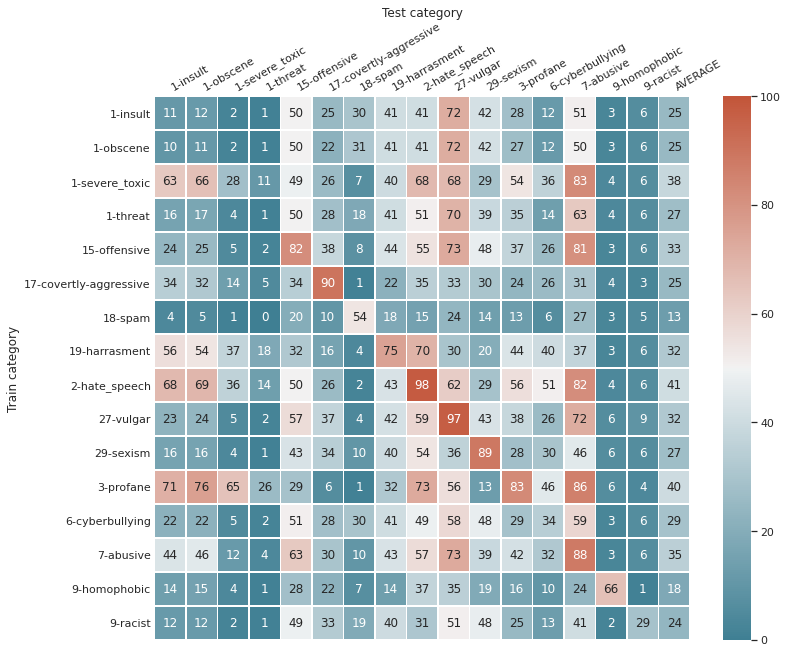

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plot_data = df.pivot("Train category", "Test category", "Score")
ax = sns.heatmap(plot_data, annot=True, vmin=0, vmax=100, linewidths=.5, ax = ax, cmap=cmap)
#ax.tick_params(axis='x', rotation=45)
ax.xaxis.tick_top() # x axis on top
ax.tick_params(length=0)  # to not show ticks
ax.xaxis.set_label_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='left')

plt.savefig('outputs/HateBERT_heatmap.png')

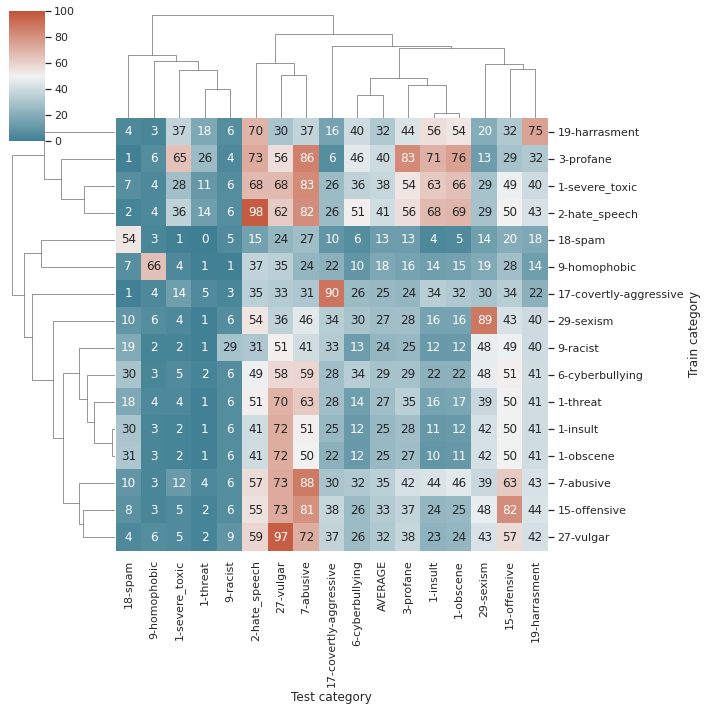

In [38]:
sns.clustermap(plot_data, cmap=cmap, annot=True, vmin=0, vmax=100,)